In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Function to train and test Naive Bayes classifier
def train_test_naive_bayes(X_train, X_test, y_train, y_test):
    # Initialize Naive Bayes classifier
    nb_classifier = GaussianNB()
    
    # Train the classifier
    nb_classifier.fit(X_train, y_train)
    
    # Test the classifier
    y_pred = nb_classifier.predict(X_test)
    
    # Calculate and return accuracy
    return accuracy_score(y_test, y_pred)

In [3]:
# Function to perform leave-one-out cross-validation
def leave_one_out_cross_validation(X, y):
    # Initialize leave-one-out cross-validation
    loo = LeaveOneOut()
    
    # Initialize list to store accuracies
    accuracies = []
    
    # Iterate over each sample
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train and test Naive Bayes classifier
        accuracy = train_test_naive_bayes(X_train, X_test, y_train, y_test)
        accuracies.append(accuracy)
    
    # Calculate and return average accuracy
    return sum(accuracies) / len(accuracies)

In [4]:
# Load Iris dataset
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_col_names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
iris_df = pd.read_csv(iris_url, names=iris_col_names)
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Load Titanic dataset
titanic_url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic_col_names = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
titanic_df = pd.read_csv(titanic_url, names=titanic_col_names, header=0)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Dataset: Iris

K value: 3
Split ratio: (0.9, 0.1), Accuracy: 1.000
Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


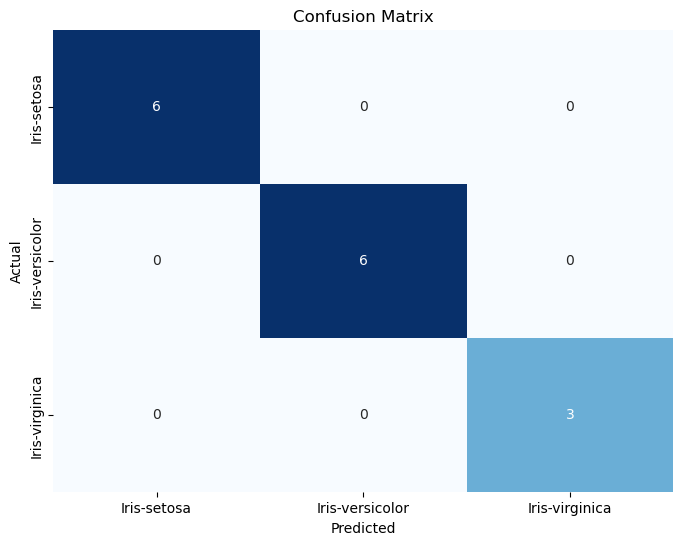

Split ratio: (0.7, 0.3), Accuracy: 0.978
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


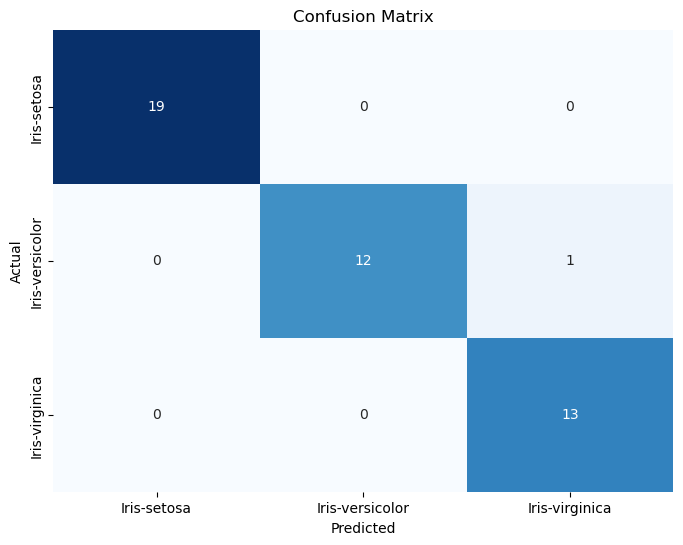

Leave-one-out Cross-validation Accuracy: 0.953


K value: 5
Split ratio: (0.9, 0.1), Accuracy: 1.000
Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


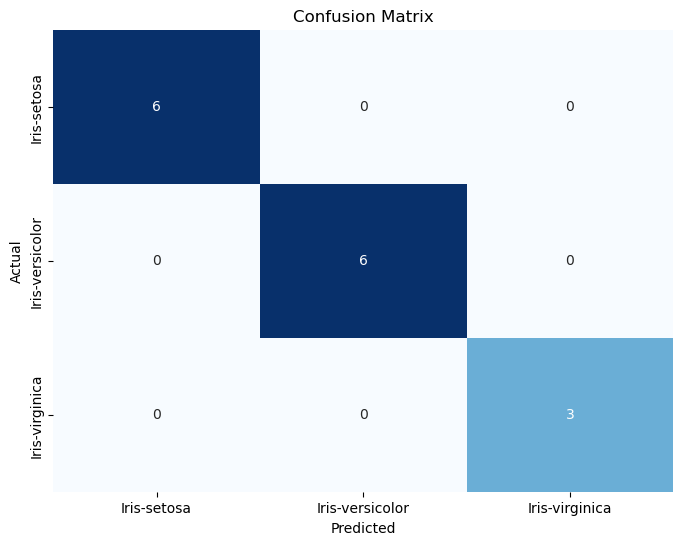

Split ratio: (0.7, 0.3), Accuracy: 0.978
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


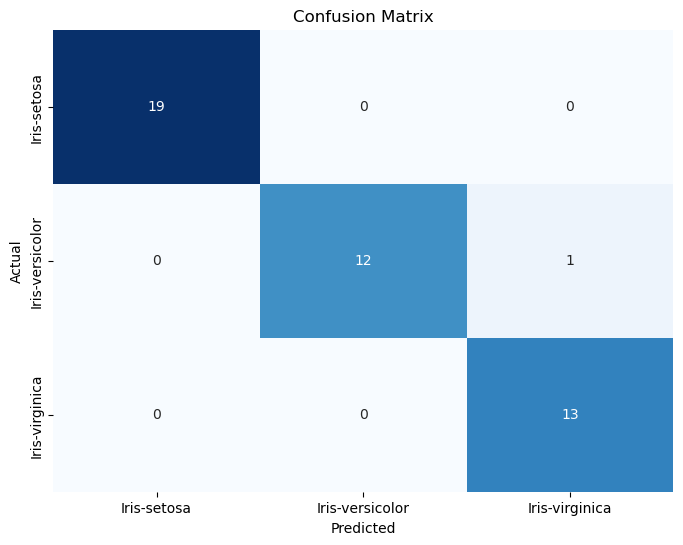

Leave-one-out Cross-validation Accuracy: 0.953


K value: 7
Split ratio: (0.9, 0.1), Accuracy: 1.000
Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


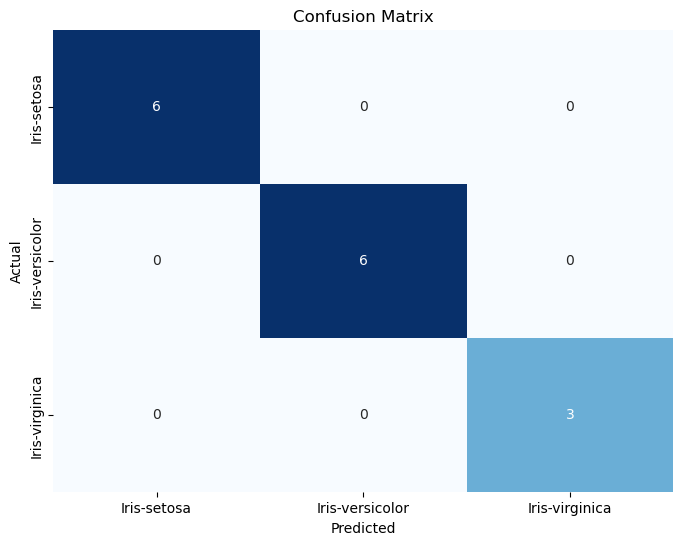

Split ratio: (0.7, 0.3), Accuracy: 0.978
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


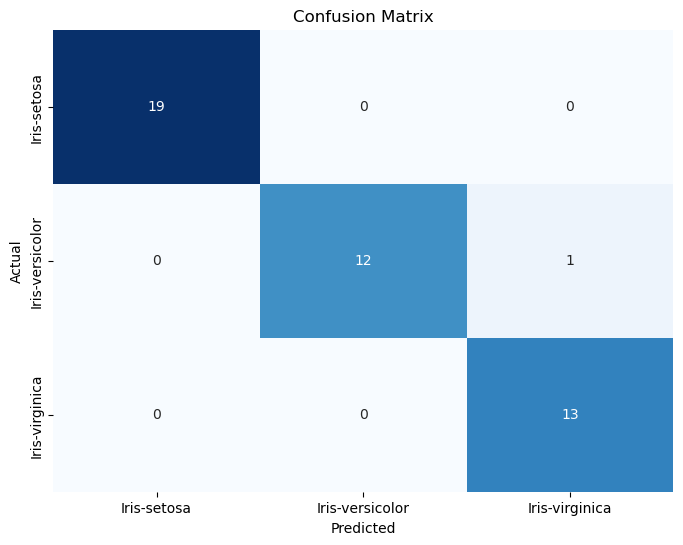

Leave-one-out Cross-validation Accuracy: 0.953



In [7]:
print("Dataset: Iris")
X_iris = iris_df.drop(columns=['Class'])
y_iris = iris_df['Class']

# For each k value and split ratio
for k in [3, 5, 7]:
    print(f"\nK value: {k}")
    for split_ratio in [(0.9, 0.1), (0.7, 0.3)]:
        X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=split_ratio[1], random_state=42)
        accuracy = train_test_naive_bayes(X_train, X_test, y_train, y_test)
        print(f"Split ratio: {split_ratio}, Accuracy: {accuracy:.3f}")
        
        # Train and predict using Naive Bayes classifier
        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train, y_train)
        y_pred = nb_classifier.predict(X_test)
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Heatmap for confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
                    xticklabels=iris_df['Class'].unique(), yticklabels=iris_df['Class'].unique())
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    # Leave-one-out cross-validation
    loo_accuracy = leave_one_out_cross_validation(X_iris, y_iris)
    print(f"Leave-one-out Cross-validation Accuracy: {loo_accuracy:.3f}\n")



K value: 3
Split ratio: (0.9, 0.1), Accuracy: 0.685
Confusion Matrix:
[[44  9]
 [19 17]]


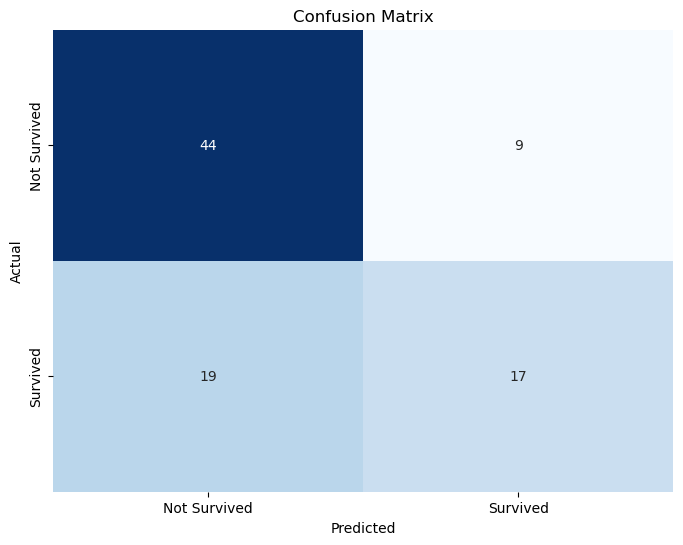

Split ratio: (0.7, 0.3), Accuracy: 0.764
Confusion Matrix:
[[143  23]
 [ 40  61]]


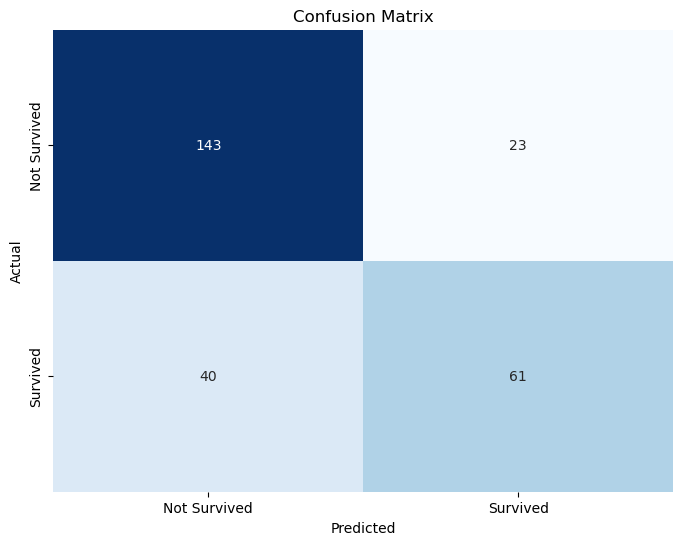

Leave-one-out Cross-validation Accuracy: 0.785


K value: 5
Split ratio: (0.9, 0.1), Accuracy: 0.685
Confusion Matrix:
[[44  9]
 [19 17]]


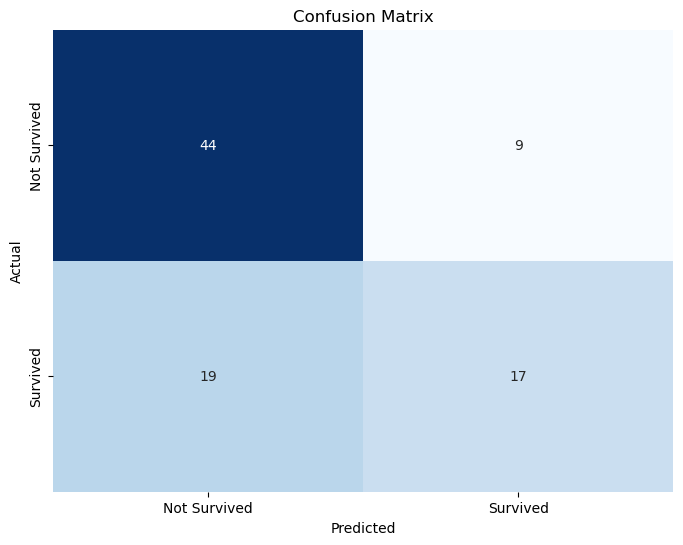

Split ratio: (0.7, 0.3), Accuracy: 0.764
Confusion Matrix:
[[143  23]
 [ 40  61]]


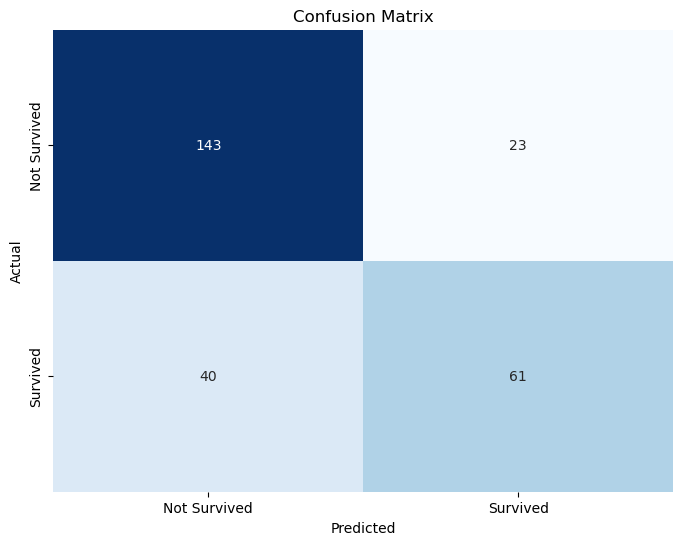

Leave-one-out Cross-validation Accuracy: 0.785


K value: 7
Split ratio: (0.9, 0.1), Accuracy: 0.685
Confusion Matrix:
[[44  9]
 [19 17]]


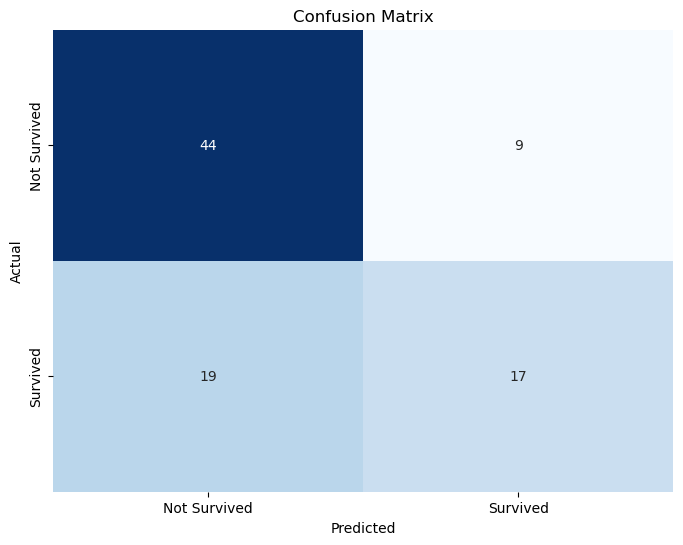

Split ratio: (0.7, 0.3), Accuracy: 0.764
Confusion Matrix:
[[143  23]
 [ 40  61]]


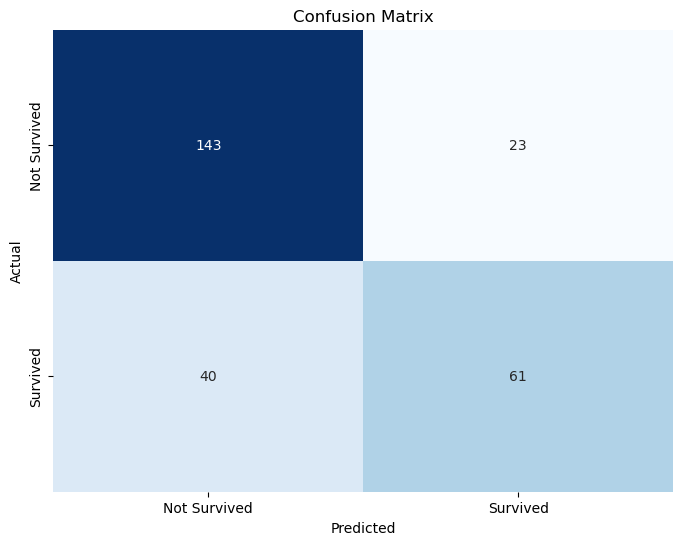

Leave-one-out Cross-validation Accuracy: 0.785



In [10]:
from sklearn.preprocessing import OneHotEncoder

# Drop irrelevant columns and encode categorical variables
X_titanic = titanic_df.drop(columns=['Name', 'Survived'])
X_titanic = pd.get_dummies(X_titanic, columns=['Sex'], drop_first=True)

y_titanic = titanic_df['Survived']

# For each k value and split ratio
for k in [3, 5, 7]:
    print(f"\nK value: {k}")
    for split_ratio in [(0.9, 0.1), (0.7, 0.3)]:
        X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=split_ratio[1], random_state=42)
        
        # Train and predict using Naive Bayes classifier
        accuracy = train_test_naive_bayes(X_train, X_test, y_train, y_test)
        print(f"Split ratio: {split_ratio}, Accuracy: {accuracy:.3f}")

        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train, y_train)
        y_pred = nb_classifier.predict(X_test)
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Heatmap for confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
                    xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    # Leave-one-out cross-validation
    loo_accuracy = leave_one_out_cross_validation(X_titanic, y_titanic)
    print(f"Leave-one-out Cross-validation Accuracy: {loo_accuracy:.3f}\n")
